# American Domestic Flights' Analysis

## Dataset - Bureau of Transportation Statistics (year 2015)

In [1]:
import pandas as pd

### Collect dataset in different dataframes according to the .csv files (monthly)

In [2]:
df_jan = pd.read_csv("monthData/january.csv")

In [3]:
df_feb = pd.read_csv("monthData/february.csv")
df_mar = pd.read_csv("monthData/march.csv")
df_apr = pd.read_csv("monthData/april.csv")

In [4]:
df_may = pd.read_csv("monthData/may.csv")
df_jun = pd.read_csv("monthData/june.csv")
df_jul = pd.read_csv("monthData/july.csv")

In [5]:
df_aug = pd.read_csv("monthData/august.csv")
df_sep = pd.read_csv("monthData/september.csv")
df_oct = pd.read_csv("monthData/october.csv")

In [6]:
df_nov = pd.read_csv("monthData/november.csv")
df_dec = pd.read_csv("monthData/december.csv")

In [7]:
df_jan.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,AIR_TIME,DISTANCE,Unnamed: 16
0,2015,1,1,4,AA,1,JFK,LAX,855.0,-5.0,1237.0,7.0,0.0,NaN,378.0,2475.0,NaN
1,2015,1,2,5,AA,1,JFK,LAX,850.0,-10.0,1211.0,-19.0,0.0,NaN,357.0,2475.0,NaN
2,2015,1,3,6,AA,1,JFK,LAX,853.0,-7.0,1151.0,-39.0,0.0,NaN,330.0,2475.0,NaN
3,2015,1,4,7,AA,1,JFK,LAX,853.0,-7.0,1218.0,-12.0,0.0,NaN,352.0,2475.0,NaN
4,2015,1,5,1,AA,1,JFK,LAX,853.0,-7.0,1222.0,-8.0,0.0,NaN,338.0,2475.0,NaN


### Filter for records of 3 airlines - American Airlines, Alaska Airlines, Delta Airlines

In [8]:
carriers = ['AA', 'AS', 'DL']
df_jan = df_jan[df_jan['CARRIER'].isin(carriers)]
df_feb = df_feb[df_feb['CARRIER'].isin(carriers)]
df_mar = df_mar[df_mar['CARRIER'].isin(carriers)]

In [9]:
df_apr = df_apr[df_apr['CARRIER'].isin(carriers)]
df_may = df_may[df_may['CARRIER'].isin(carriers)]
df_jun = df_jun[df_jun['CARRIER'].isin(carriers)]

In [10]:
df_jul = df_jul[df_jul['CARRIER'].isin(carriers)]
df_aug = df_aug[df_aug['CARRIER'].isin(carriers)]
df_sep = df_sep[df_sep['CARRIER'].isin(carriers)]

In [11]:
df_oct = df_oct[df_oct['CARRIER'].isin(carriers)]
df_nov = df_nov[df_nov['CARRIER'].isin(carriers)]
df_dec = df_dec[df_dec['CARRIER'].isin(carriers)]

In [12]:
df_allData = pd.concat([df_jan,df_feb,df_mar,df_apr,df_may,df_jun,df_jul,df_aug, df_sep,df_oct,df_nov,df_dec], ignore_index=True)

df_allData.shape

(1774386, 17)

In [13]:
df_allData.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,AIR_TIME,DISTANCE,Unnamed: 16
0,2015,1,1,4,AA,1,JFK,LAX,855.0,-5.0,1237.0,7.0,0.0,NaN,378.0,2475.0,NaN
1,2015,1,2,5,AA,1,JFK,LAX,850.0,-10.0,1211.0,-19.0,0.0,NaN,357.0,2475.0,NaN
2,2015,1,3,6,AA,1,JFK,LAX,853.0,-7.0,1151.0,-39.0,0.0,NaN,330.0,2475.0,NaN
3,2015,1,4,7,AA,1,JFK,LAX,853.0,-7.0,1218.0,-12.0,0.0,NaN,352.0,2475.0,NaN
4,2015,1,5,1,AA,1,JFK,LAX,853.0,-7.0,1222.0,-8.0,0.0,NaN,338.0,2475.0,NaN


## Cleaning and Validation

In [14]:
import numpy as np

In [15]:
del df_allData['Unnamed: 16']

In [16]:
def timestring(item):
    item = str(item)
    if item == 'nan':
        return item
    elif item == '2400.0':
        item = '00:00'
    elif len(item) == 5:
        item = '0'+item[:-4]+':'+item[-4:-2]
    elif len(item) == 4:
        item = '00:'+item[:2]
    elif len(item) == 3:
        item = '00:0'+item[0]
    else:
        item = item[:-4]+':'+item[-4:-2]
        
    return item

In [17]:
notcancel = df_allData[df_allData['CANCELLED']==0].drop('CANCELLATION_CODE', axis=1)

In [18]:
notcancel = notcancel.dropna(how='any', axis=0)

In [19]:
notcancel['DEP_TIME'] = notcancel['DEP_TIME'].apply(lambda x : timestring(x))
notcancel['ARR_TIME'] = notcancel['ARR_TIME'].apply(lambda x : timestring(x))

In [20]:
notcancel.head()

,YEAR,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,CARRIER,FL_NUM,ORIGIN,DEST,DEP_TIME,DEP_DELAY,ARR_TIME,ARR_DELAY,CANCELLED,AIR_TIME,DISTANCE
0,2015,1,1,4,AA,1,JFK,LAX,08:55,-5.0,12:37,7.0,0.0,378.0,2475.0
1,2015,1,2,5,AA,1,JFK,LAX,08:50,-10.0,12:11,-19.0,0.0,357.0,2475.0
2,2015,1,3,6,AA,1,JFK,LAX,08:53,-7.0,11:51,-39.0,0.0,330.0,2475.0
3,2015,1,4,7,AA,1,JFK,LAX,08:53,-7.0,12:18,-12.0,0.0,352.0,2475.0
4,2015,1,5,1,AA,1,JFK,LAX,08:53,-7.0,12:22,-8.0,0.0,338.0,2475.0


In [21]:
notcancel['DEP_HOUR'] = notcancel['DEP_TIME'].apply(lambda x : int(x.split(":")[0]))
notcancel['DEP_MIN'] = notcancel['DEP_TIME'].apply(lambda x : int(x.split(":")[1]))
notcancel['ARR_HOUR'] = notcancel['ARR_TIME'].apply(lambda x : int(x.split(":")[0]))
notcancel['ARR_MIN'] = notcancel['ARR_TIME'].apply(lambda x : int(x.split(":")[1]))

## Analysis

In [22]:
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## $1.\:General$

## a. Total number of flights per month

In [23]:
total = df_allData[['MONTH','FL_NUM']]
total = total.groupby('MONTH').sum()
total.head()

,FL_NUM
MONTH,
1,166802479
2,155733641
3,184935279
4,178974351
5,181183662


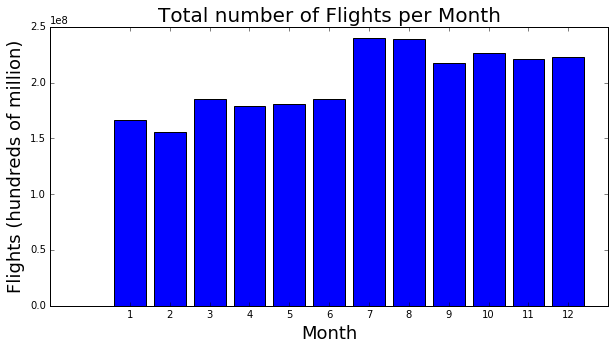

In [24]:
plt.subplots(figsize=(10,5))
obj = total.index
y_pos = np.arange(len(obj))
plt.bar(y_pos, total['FL_NUM'], align='center')

plt.xticks(y_pos,obj)
plt.xlabel("Month", fontsize = '18')
plt.title("Total number of Flights per Month", fontsize = '20')
plt.ylabel("Flights (hundreds of million)",fontsize = '18')

### Insight - There are more flights flying in the second half of the year, starting from July

## b. Number of flights departing each hour in a Day throughout 2015

In [25]:
hourly_dep = notcancel[['DEP_HOUR','FL_NUM']]

df1 = hourly_dep.groupby(['DEP_HOUR']).sum()
df1.head()

,FL_NUM
DEP_HOUR,
0,15348316
1,4612165
2,537749
3,121351
4,7130530


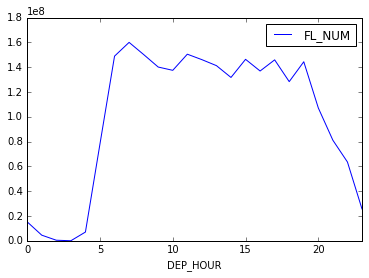

In [26]:
df1.plot()

### Insight - Very less domestic flights take off from 11pm to 5am, daily.

## $2.\:Comparison\:of\:the\:carriers:$

## a. Number of delayed flights of each carrier month wise

### Assumption: Flights are delayed if they depart 15 (or more) minutes late

In [27]:
dep_delayed = notcancel[notcancel['DEP_DELAY'] > 15.0]

In [28]:
dep_delayedMonthly = dep_delayed[['MONTH', 'CARRIER', 'FL_NUM']]

In [29]:
dep_delayedMonthly111 = dep_delayedMonthly.groupby(['CARRIER','MONTH']).sum()
ddm = dep_delayedMonthly111.unstack().T

In [30]:
ddm = ddm.reset_index(level=0)

In [31]:
ddm.head()

CARRIER,level_0,AA,AS,DL
MONTH,,,,
1,FL_NUM,11017492,691856,12721439
2,FL_NUM,8314930,560875,18764183
3,FL_NUM,11644363,719158,17743596
4,FL_NUM,10697576,451556,14112875
5,FL_NUM,10606732,505029,15142517


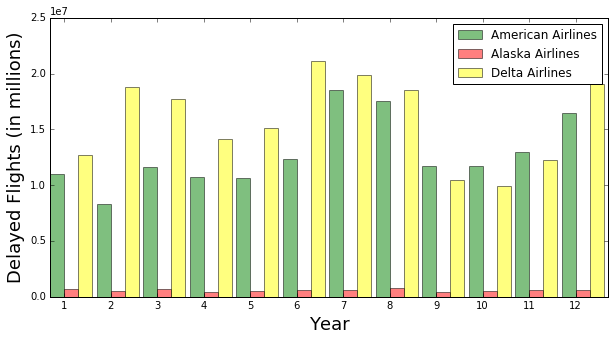

In [32]:
x = np.arange(len(ddm))
bar_width = 0.3
opacity = 0.5
plt.subplots(figsize=(10,5))
plt.bar(x, ddm['AA'], bar_width, color='green', label='American Airlines', alpha=opacity)
plt.bar(x + bar_width, ddm['AS'], bar_width, color='red', label='Alaska Airlines', alpha=opacity)
plt.bar(x + 2*bar_width, ddm['DL'], bar_width, color='yellow', label='Delta Airlines', alpha=opacity)
plt.legend()
plt.xlabel('Year', fontsize='18')
plt.ylabel('Delayed Flights (in millions)', fontsize='18')
plt.xticks(x+bar_width, np.arange(1,13))
plt.show()

### Insight - Alaska Airlines are hardly delayed as compared to AA and DL, Delta Airlines being the top among the three

## b. Number of cancelled flights of each carrier month wise

In [33]:
cancel = df_allData[df_allData['CANCELLED'] == 1.0].drop(['DEP_TIME','ARR_TIME','DEP_DELAY','ARR_DELAY','AIR_TIME'], axis=1)
cancel['CANCELLATION_CODE'] = cancel['CANCELLATION_CODE'].replace(to_replace = ['A','B','C','D'], value=['Carrier','Weather','National Air System','Security'])
cancel_monthly = cancel[['MONTH', 'CARRIER', 'FL_NUM']]
cancel_monthly111 = cancel_monthly.groupby(['CARRIER','MONTH']).sum()
cm = cancel_monthly111.unstack().T

In [34]:
cm = cm.reset_index(level=0)

In [35]:
cm.head()

CARRIER,level_0,AA,AS,DL
MONTH,,,,
1,FL_NUM,1014453,10452,1146056
2,FL_NUM,3278618,18217,2888993
3,FL_NUM,1744874,7563,875952
4,FL_NUM,480650,13375,256120
5,FL_NUM,1233598,11048,233013


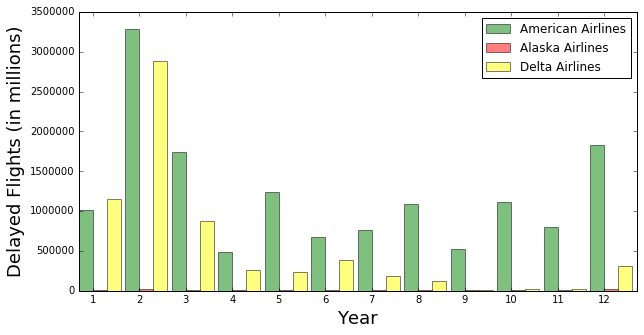

In [36]:
x = np.arange(len(cm))
bar_width = 0.3
opacity = 0.5
plt.subplots(figsize=(10,5))
plt.bar(x, cm['AA'], bar_width, color='green', label='American Airlines', alpha=opacity)
plt.bar(x + bar_width, cm['AS'], bar_width, color='red', label='Alaska Airlines', alpha=opacity)
plt.bar(x + 2*bar_width, cm['DL'], bar_width, color='yellow', label='Delta Airlines', alpha=opacity)
plt.legend()
plt.xlabel('Year', fontsize='18')
plt.ylabel('Delayed Flights (in millions)', fontsize='18')
plt.xticks(x+bar_width, np.arange(1,13))
plt.show()

### Insight - Again, Alaska Airlines rarely cancel their flights. Here, American Airlines rank top most among the three.

## c. Percentage of each reason for cancellation of flights

In [37]:
cancel_reason = cancel[['CANCELLATION_CODE','CANCELLED']].groupby('CANCELLATION_CODE').sum()
cancel_reason

,CANCELLED
CANCELLATION_CODE,
Carrier,3807.0
National Air System,1005.0
Security,4.0
Weather,10596.0


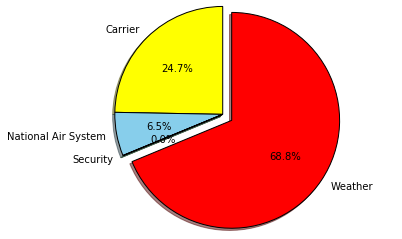

In [38]:
labels = 'Carrier', 'National Air System', 'Security', 'Weather'
sizes = cancel_reason['CANCELLED']
colors = ['yellow', 'skyblue', 'green', 'red']
explode = (0, 0, 0, 0.1)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.show()

### Insight - Most flights are cancelled due to bad weather conditions (about 68.8%), the second most important reason is the carrier faults

## $3.\:Comparison\:between\:the\:airports:$

## a. Traffic analysis for top airports

### Outbound flights:

In [39]:
df_airports = df_allData[['MONTH','DAY_OF_WEEK','ORIGIN','DEST','FL_NUM']]

In [40]:
outbound = df_airports[['MONTH','ORIGIN','FL_NUM']]
outbound111 = outbound.groupby(['ORIGIN']).sum()
out = outbound111.unstack().T

In [41]:
out = out.reset_index(level=0)
out.head()

,level_0,0
ORIGIN,,
ABE,MONTH,2243
ABQ,MONTH,26373
ADK,MONTH,685
ADQ,MONTH,3236
AGS,MONTH,4654


In [42]:
out = out.rename(columns = {0:'Flights'})

In [43]:
out1 = out.sort_values(by = ['Flights'], ascending=False)[:10]
out1.head()

,level_0,Flights
ORIGIN,,
ATL,FL_NUM,407552835
DFW,FL_NUM,219231739
MSP,FL_NUM,111263458
DTW,FL_NUM,94007083
CLT,FL_NUM,87941289


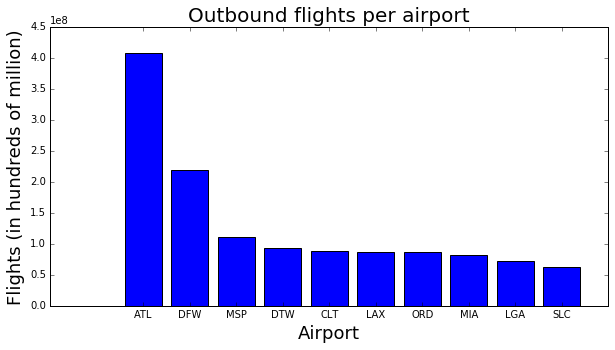

In [44]:
plt.subplots(figsize=(10,5))
obj = out1.index
y_pos = np.arange(len(obj))
plt.bar(y_pos, out1['Flights'], align='center')

plt.xticks(y_pos, obj)
plt.xlabel("Airport", fontsize = '18')
plt.title("Outbound flights per airport", fontsize = '20')
plt.ylabel("Flights (in hundreds of million)",fontsize = '18')
plt.show()

### Inbound flights:

In [45]:
inbound = df_airports[['MONTH','DEST','FL_NUM']]
inbound111 = inbound.groupby(['DEST']).sum()
inb = inbound111.unstack().T

In [46]:
inb = inb.reset_index(level=0)
inb.head()

,level_0,0
DEST,,
ABE,MONTH,2234
ABQ,MONTH,26362
ADK,MONTH,685
ADQ,MONTH,3236
AGS,MONTH,4637


In [47]:
inb = inb.rename(columns = {0:'Flights'})

In [48]:
in1 = inb.sort_values(by = ['Flights'], ascending=False)[:10]
in1.head()

,level_0,Flights
DEST,,
ATL,FL_NUM,398409162
DFW,FL_NUM,210632026
MSP,FL_NUM,108299123
DTW,FL_NUM,89621564
LAX,FL_NUM,84916365


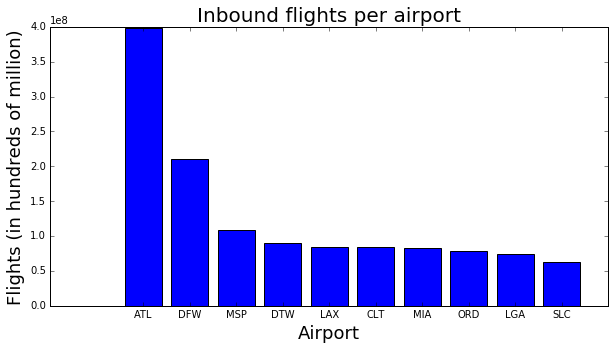

In [49]:
plt.subplots(figsize=(10,5))
obj = in1.index
y_pos = np.arange(len(obj))
plt.bar(y_pos, in1['Flights'], align='center')

plt.xticks(y_pos, obj)
plt.xlabel("Airport", fontsize = '18')
plt.title("Inbound flights per airport", fontsize = '20')
plt.ylabel("Flights (in hundreds of million)",fontsize = '18')
plt.show()

### Insight - ATL, DFW, MSP are the busiest airports in the US for domestic flights

## b. Analysis for ATL (Hartsfield–Jackson Atlanta) Airport

In [50]:
ATL_out = df_airports[['MONTH','ORIGIN','FL_NUM']][df_airports['ORIGIN'] == 'ATL'].groupby('MONTH').sum()
ATL_in = df_airports[['MONTH','DEST','FL_NUM']][df_airports['DEST'] == 'ATL'].groupby('MONTH').sum()
ATL_out.head()

,FL_NUM
MONTH,
1,30034824
2,28912913
3,34257428
4,33639025
5,34633492


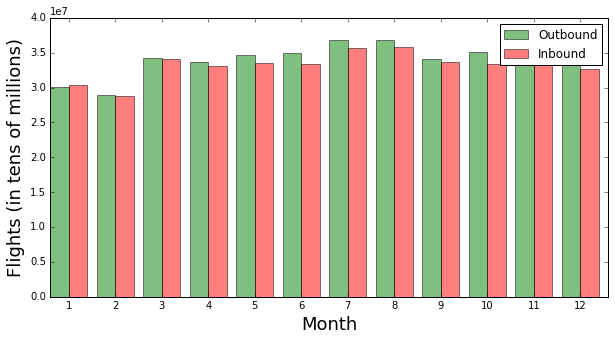

In [51]:
x = np.arange(len(ATL_out))
bar_width = 0.4
opacity = 0.5
plt.subplots(figsize=(10,5))
plt.bar(x, ATL_out['FL_NUM'], bar_width, color='green', label='Outbound', alpha=opacity)
plt.bar(x + bar_width, ATL_in['FL_NUM'], bar_width, color='red', label='Inbound', alpha=opacity)

plt.legend()
plt.xlabel('Month', fontsize='18')
plt.ylabel('Flights (in tens of millions)', fontsize='18')
plt.xticks(x+bar_width, np.arange(1,13))
plt.show()

### Insight - We can see that it's a busy airport, having almost equal number of outbound and inbound flights. This could mean that it is a connecting airport.

## Just out of Curiosity, I would like to analyze RSW (Southwest Florida International) Airport, because Florida is a tourist place.

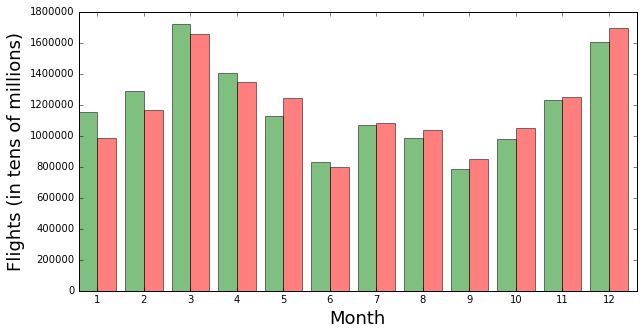

In [52]:
RSW_out = df_airports[['MONTH','ORIGIN','FL_NUM']][df_airports['ORIGIN'] == 'RSW'].groupby('MONTH').sum()
RSW_in = df_airports[['MONTH','DEST','FL_NUM']][df_airports['DEST'] == 'RSW'].groupby('MONTH').sum()

x = np.arange(len(RSW_out))
bar_width = 0.4
opacity = 0.5
plt.subplots(figsize=(10,5))
plt.bar(x, RSW_out['FL_NUM'], bar_width, color='green', label='Outbound', alpha=opacity)
plt.bar(x + bar_width, RSW_in['FL_NUM'], bar_width, color='red', label='Inbound', alpha=opacity)

#plt.legend()
plt.xlabel('Month', fontsize='18')
plt.ylabel('Flights (in tens of millions)', fontsize='18')
plt.xticks(x+bar_width, np.arange(1,13))
plt.show()

### Insight - Looks like people usually fly to Florida in December and May; and there are many outbound flights in January and February. This can give a reason of Florida being a tourist place where people mostly enjoy in the months of May and December.

___

# $$Machine \:Learning \:Techniques$$

## $1.\:Linear\:Regression\:Model$

### Build Training dataset with data from first 8 months and Test dataset from last 4 months.

In [53]:
df_trainData = notcancel[notcancel['MONTH'] <= 8]

In [54]:
airports = pd.read_csv('L_AIRPORT.csv')
airports_dict = dict([(i,j) for i,j in zip(np.arange(len(airports)), airports.Code)])
airports_dict = {v:k for k,v in airports_dict.iteritems()}

In [55]:
df_trainData['ORIGIN'] = map(airports_dict.get, df_trainData['ORIGIN'], df_trainData['ORIGIN'])
df_trainData['DEST'] = map(airports_dict.get, df_trainData['DEST'], df_trainData['DEST'])

C:\Users\NeerajB\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\NeerajB\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [56]:
X_train = df_trainData.drop(['YEAR','DAY_OF_MONTH','DEP_MIN','ARR_MIN','CARRIER','ARR_DELAY','CANCELLED','DEP_TIME','ARR_TIME','FL_NUM'],1)
X_train.head()

,MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY,AIR_TIME,DISTANCE,DEP_HOUR,ARR_HOUR
0,1,4,2532,2934,-5.0,378.0,2475.0,8,12
1,1,5,2532,2934,-10.0,357.0,2475.0,8,12
2,1,6,2532,2934,-7.0,330.0,2475.0,8,11
3,1,7,2532,2934,-7.0,352.0,2475.0,8,12
4,1,1,2532,2934,-7.0,338.0,2475.0,8,12


In [57]:
Y_train = df_trainData['ARR_DELAY']

In [58]:
df_testData = notcancel[notcancel['MONTH'] > 8]

df_testData['ORIGIN'] = map(airports_dict.get, df_testData['ORIGIN'], df_testData['ORIGIN'])
df_testData['DEST'] = map(airports_dict.get, df_testData['DEST'], df_testData['DEST'])

X_test = df_testData.drop(['YEAR','DAY_OF_MONTH','DEP_MIN','ARR_MIN','CARRIER','ARR_DELAY','CANCELLED','DEP_TIME','ARR_TIME','FL_NUM'],1)

#X_test = X_test.dropna(how='any', axis=0)
X_test.head()

C:\Users\NeerajB\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\NeerajB\AppData\Local\Enthought\Canopy\User\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY,AIR_TIME,DISTANCE,DEP_HOUR,ARR_HOUR
1125655,9,2,2532,2934,-7.0,316.0,2475.0,8,11
1125656,9,3,2532,2934,-6.0,310.0,2475.0,8,12
1125657,9,4,2532,2934,-3.0,314.0,2475.0,8,11
1125658,9,5,2532,2934,-8.0,322.0,2475.0,8,11
1125659,9,6,2532,2934,-3.0,314.0,2475.0,8,11


In [59]:
Y_test = df_testData['ARR_DELAY']

In [60]:
import sklearn
from sklearn.linear_model import LinearRegression

In [61]:
lrmodel = LinearRegression()

In [62]:
lrmodel.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
pd.DataFrame(['%.5f' %x for x in lrmodel.coef_],X_train.columns, columns=['Coefficient'])

,Coefficient
MONTH,0.02957
DAY_OF_WEEK,-0.14393
ORIGIN,0.00074
DEST,0.00015
DEP_DELAY,1.00360
AIR_TIME,0.36218
DISTANCE,-0.04459
DEP_HOUR,-0.04446
ARR_HOUR,-0.02465


### Prediction and Calculating mean square errors:

In [64]:
pred_train = lrmodel.predict(X_train)
pred_test = lrmodel.predict(X_test)

mse_train = np.mean((Y_train - pred_train) ** 2)
mse_test =  np.mean((Y_test - pred_test) ** 2)

print 'MSE for training dataset = %.3f' %mse_train
print 'MSE for test dataset = %.3f' %mse_test

MSE for training dataset = 159.586
MSE for test dataset = 150.685


In [65]:
print 'Accuracy of Linear Regression (r-squarred value) = %.2f' % sklearn.metrics.r2_score(Y_test, pred_test)

Accuracy of Linear Regression (r-squarred value) = 0.89


### Showing some random predictions:

In [66]:
Predicted = pd.DataFrame(np.array(Y_test), columns=['Actual Arrival Delay'])
Predicted['Predicted Arrival Delay'] = pred_test
Predicted.tail(10)

,Actual Arrival Delay,Predicted Arrival Delay
644130,-2.0,-11.736690
644131,26.0,22.191869
644132,2.0,8.506221
644133,-36.0,-24.022895
644134,24.0,29.209882
644135,-4.0,-7.625735
644136,30.0,26.188572
644137,11.0,7.215811
644138,3.0,-0.605247
644139,53.0,42.372415


### Scatter Plot of the Residuals

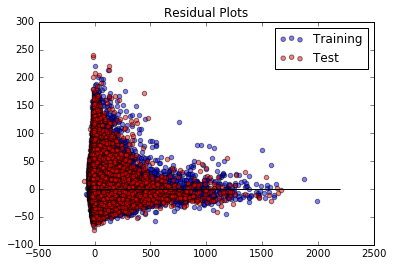

In [67]:
train = plt.scatter(pred_train,(Y_train-pred_train),c='b',alpha=0.5)

# Scatter plot the testing data
test = plt.scatter(pred_test,(Y_test-pred_test),c='r',alpha=0.5)

# Plot a horizontal axis line at 0
plt.hlines(y=0,xmin=-75,xmax=2200)

#Labels
plt.legend((train,test),('Training','Test'),loc='best')
plt.title('Residual Plots')
plt.show()

### $2.\:Logistic \:Regression: \:It \:gives \:binary \:classification \:if \:the \:flight \:will \:be \:delayed \:or \:not$

In [68]:
from sklearn.linear_model import LogisticRegression

In [69]:
log_model = LogisticRegression()

In [70]:
X_train.head()

,MONTH,DAY_OF_WEEK,ORIGIN,DEST,DEP_DELAY,AIR_TIME,DISTANCE,DEP_HOUR,ARR_HOUR
0,1,4,2532,2934,-5.0,378.0,2475.0,8,12
1,1,5,2532,2934,-10.0,357.0,2475.0,8,12
2,1,6,2532,2934,-7.0,330.0,2475.0,8,11
3,1,7,2532,2934,-7.0,352.0,2475.0,8,12
4,1,1,2532,2934,-7.0,338.0,2475.0,8,12


In [71]:
def func(arr):
    li = []
    for item in arr:
        if item > 15:
            li.append(1)
        else:
            li.append(0)
    return li
            

In [72]:
Y_train1 = func(df_trainData['ARR_DELAY'])
Y_train1[:15]

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [73]:
df_testData['ARR_DELAY'].describe()

count    644140.000000
mean         -0.932038
std          36.638903
min         -80.000000
25%         -16.000000
50%          -8.000000
75%           3.000000
max        1665.000000
Name: ARR_DELAY, dtype: float64

In [74]:
Y_test1 = func(df_testData['ARR_DELAY'])
Y_test1[:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0]

In [75]:
log_model.fit(X_train, Y_train1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [76]:
pred_logistic = log_model.predict(X_test)

In [77]:
print 'Accuracy of Logistic Model: %.3f'  % sklearn.metrics.accuracy_score(Y_test1, pred_logistic)

Accuracy of Logistic Model: 0.946


### Random Predictions

In [78]:
Predicted2 = pd.DataFrame(np.array(Y_test1), columns=['Actual Delay Status'])
Predicted2['Predicted Delay Status'] = pred_logistic
Predicted2.tail(10)

,Actual Delay Status,Predicted Delay Status
644130,0,0
644131,1,1
644132,0,0
644133,0,0
644134,1,1
644135,0,0
644136,1,1
644137,0,0
644138,0,0
644139,1,1


### $Logistic\:Regression\:Model \:can \:predict \:more \:accurately,\:with\:the \:accuracy\:of \:94.6 \% $